In [24]:
# Import required libraries
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import filters

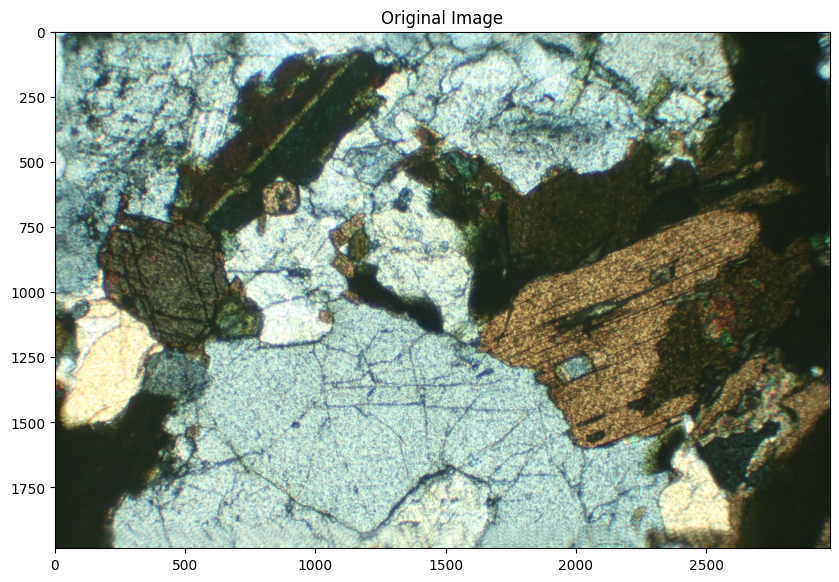

In [47]:
# Load and display original image
image_path = './thin-sections/w15/w15_composite.jpg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title('Original Image')
plt.show()

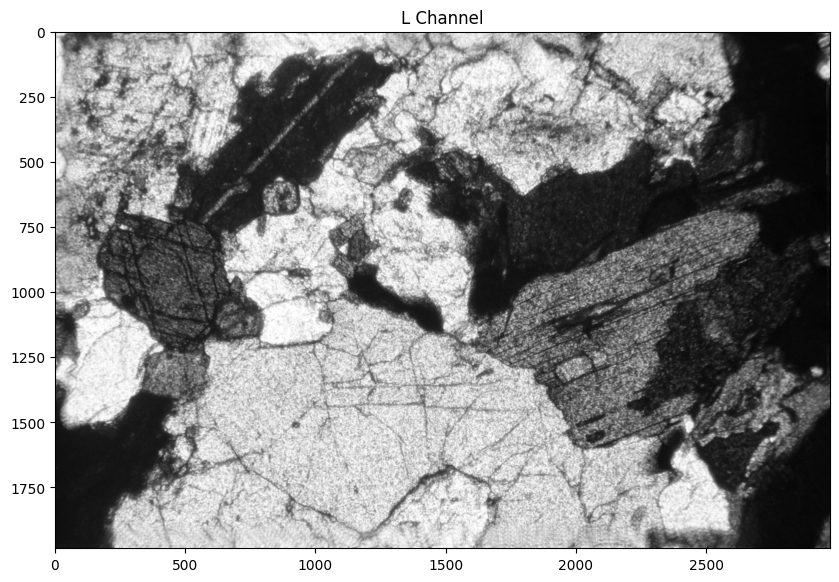

In [46]:
# Step 1: Convert to LAB and get L channel
def get_l_channel(image):
    img_uint8 = (image * 255).astype(np.uint8) if image.max() <= 1.0 else image.astype(np.uint8)
    lab = cv2.cvtColor(img_uint8, cv2.COLOR_BGR2LAB)
    return lab[:,:,0]

l_channel = get_l_channel(img_rgb)

plt.figure(figsize=(10, 10))
plt.imshow(l_channel, cmap='gray')
plt.title('L Channel')
plt.show()

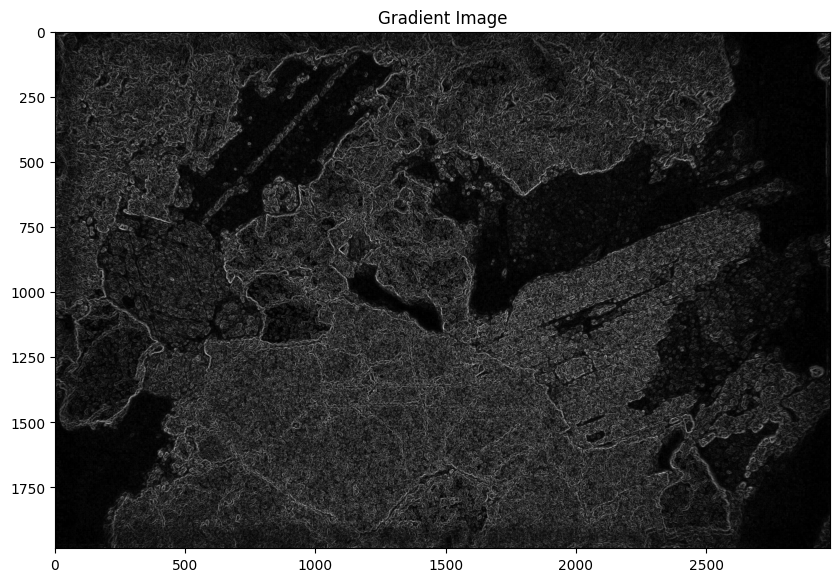

In [55]:
# Step 2: Create gradient image
def create_gradient(image, sigma=1):
    """
    Create gradient image using Sobel filter
    sigma: Gaussian smoothing parameter
    """
    return filters.sobel(image)

gradient = create_gradient(l_channel, sigma=1)

plt.figure(figsize=(10, 10))
plt.imshow(gradient, cmap='gray')
plt.title('Gradient Image')
plt.show()

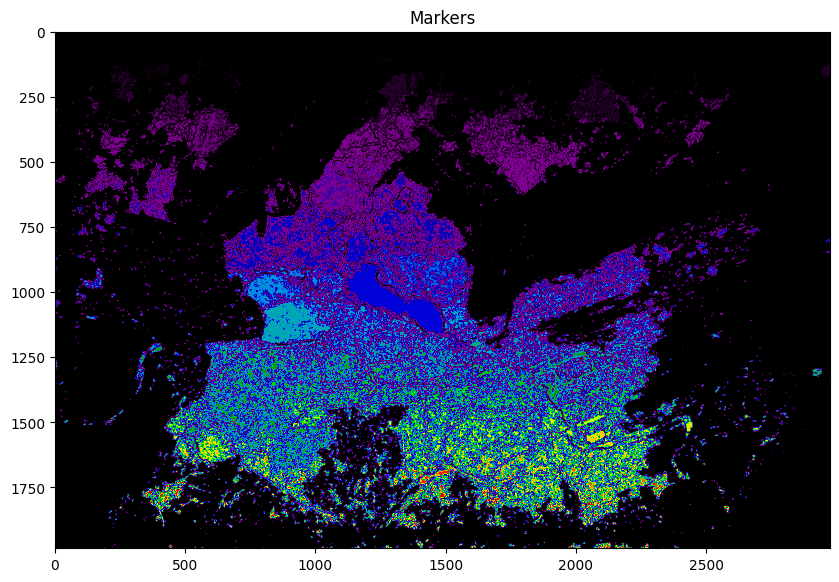

In [40]:
# Step 3: Create markers for watershed
def create_markers(gradient_img, threshold_method='otsu'):
    """
    Create markers for watershed algorithm
    threshold_method: 'otsu' or 'manual'
    """
    if threshold_method == 'otsu':
        thresh = filters.threshold_otsu(gradient_img)
    else:
        thresh = 0.5  # manual threshold, adjust as needed
        
    markers = gradient_img < thresh
    return ndimage.label(markers)[0]

markers = create_markers(gradient)

plt.figure(figsize=(10, 10))
plt.imshow(markers, cmap='nipy_spectral')
plt.title('Markers')
plt.show()

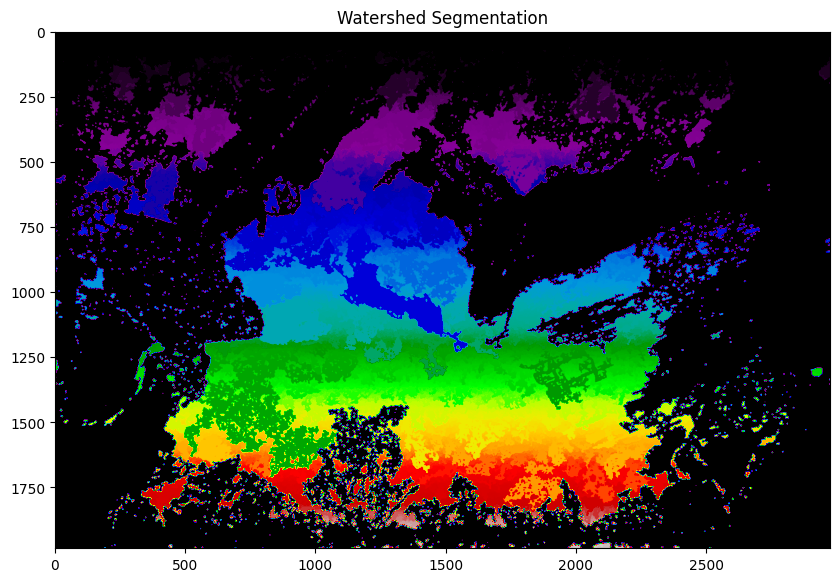

In [41]:
# Step 4: Apply watershed
def apply_watershed(gradient_img, markers):
    """
    Apply watershed algorithm
    """
    return segmentation.watershed(gradient_img, markers)

segments = apply_watershed(gradient, markers)

plt.figure(figsize=(10, 10))
plt.imshow(segments, cmap='nipy_spectral')
plt.title('Watershed Segmentation')
plt.show()

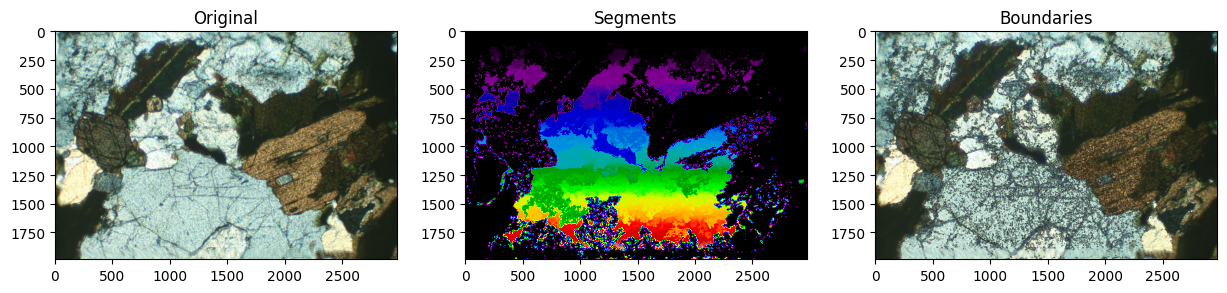

In [42]:
# Visualization helper
def plot_boundaries(original_img, segments):
    """
    Plot segmentation boundaries on original image
    """
    boundaries = segmentation.find_boundaries(segments)
    
    img_with_boundaries = original_img.copy()
    img_with_boundaries[boundaries] = [1, 0, 0]  # Red boundaries
    
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.imshow(original_img)
    plt.title('Original')
    
    plt.subplot(132)
    plt.imshow(segments, cmap='nipy_spectral')
    plt.title('Segments')
    
    plt.subplot(133)
    plt.imshow(img_with_boundaries)
    plt.title('Boundaries')
    
    plt.show()

plot_boundaries(img_rgb, segments)

In [43]:
# Analysis helper
def analyze_segments(segments):
    """
    Print basic statistics about segments
    """
    num_segments = len(np.unique(segments))
    sizes = np.bincount(segments.ravel())
    avg_size = np.mean(sizes[sizes > 0])
    
    print(f"Number of segments: {num_segments}")
    print(f"Average segment size: {avg_size:.1f} pixels")
    
    return sizes

sizes = analyze_segments(segments)

Number of segments: 23266
Average segment size: 253.8 pixels


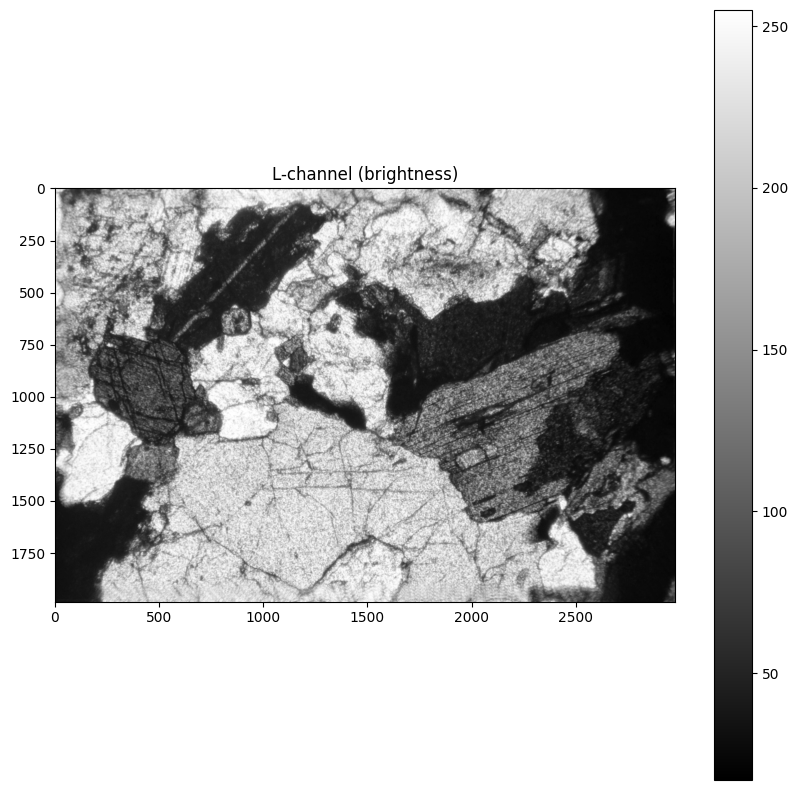

In [56]:
# 1. Original L-channel image
plt.figure(figsize=(10,10))
plt.imshow(l_channel, cmap='gray')
plt.title('L-channel (brightness)')
plt.colorbar()
plt.show()

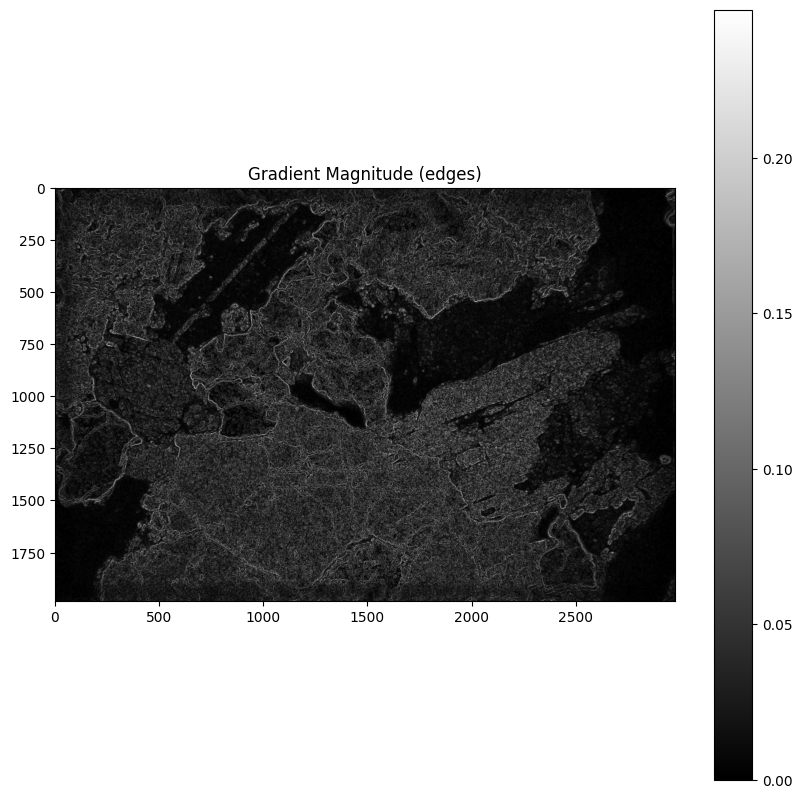

In [58]:
# 2. Gradient magnitude (this is what watershed actually sees as "elevation")
gradient = filters.sobel(l_channel)
plt.figure(figsize=(10,10))
plt.imshow(gradient, cmap='gray')
plt.title('Gradient Magnitude (edges)')
plt.colorbar()
plt.show()

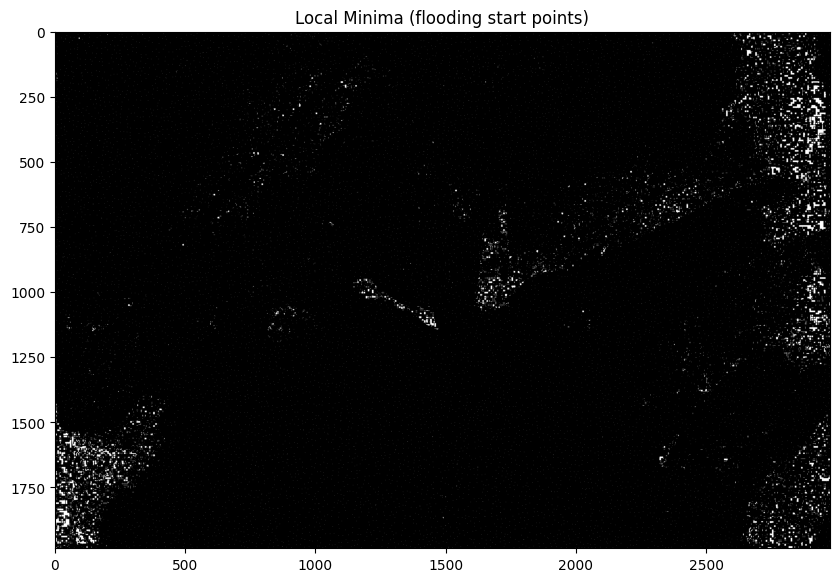

In [59]:
# 3. Local minima (potential starting points for flooding)
from scipy import ndimage
local_min = ndimage.minimum_filter(gradient, size=20)
minima = (gradient == local_min)

plt.figure(figsize=(10,10))
plt.imshow(minima, cmap='gray')
plt.title('Local Minima (flooding start points)')
plt.show()

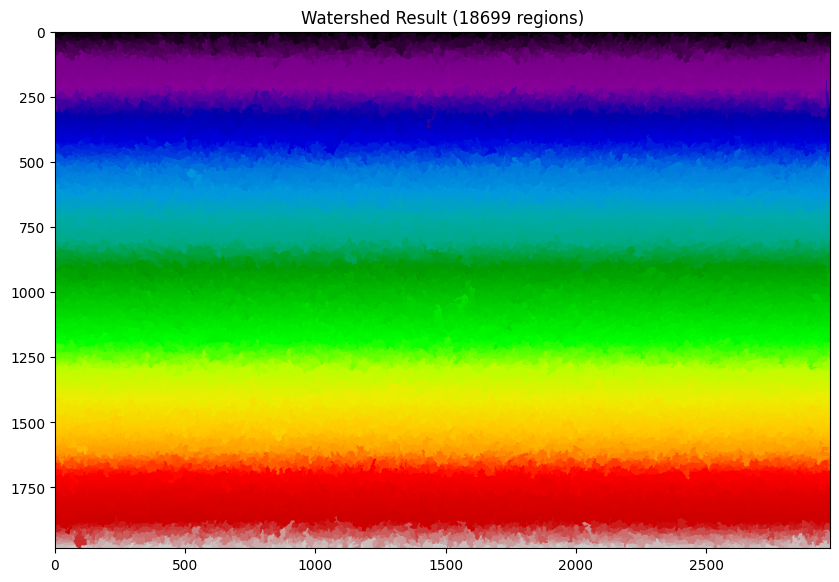

In [60]:
# 4. Result of watershed
from skimage import segmentation
markers = ndimage.label(minima)[0]
segments = segmentation.watershed(gradient, markers)

plt.figure(figsize=(10,10))
plt.imshow(segments, cmap='nipy_spectral')
plt.title(f'Watershed Result ({len(np.unique(segments))} regions)')
plt.show()